In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch.nn.functional as F
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/Hari/Evaluation/Diffusion/")
sys.path.append(os.path.abspath("src"))
print("Changed directory to:", os.getcwd())
from sample import sample
from sample2 import sample2

Changed directory to: /content/drive/MyDrive/Hari/Evaluation/Diffusion


In [ ]:
from noise_scheduler import LinNoiseScheduler
from model_unet import Unet

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Load model with checkpoint
model = Unet(im_channels =1).to(device)
model.load_state_dict(torch.load("/content/drive/MyDrive/Hari/Evaluation/Diffusion/results/model_checkpoint.pth"))
model.eval()
# Create the noise scheduler
scheduler = LinNoiseScheduler(num_of_timesteps=1000,beta_start=0.0001,beta_end = 0.02)

In [ ]:
with torch.no_grad():
  sample2(model, scheduler)

The cell above to 18 mins to be executed. It created 100 new samples of Gravitational Lensing. They are saved as following for review:
./results/train_1_2/

Please look at "./src/sample2.py" for the exact motivation for this sampling.

In [ ]:
def count_npy_files(directory):
    """Counts the number of .npy files in the given directory and its subdirectories."""
    count = sum(len([f for f in files if f.endswith('.npy')]) for _, _, files in os.walk(directory))
    return count
for i in range(100):
  dir = '/content/drive/MyDrive/Hari/Evaluation/Diffusion/results/train_1_2/sample_{}/npy'.format(i)
  count = count_npy_files(dir)
  print('sample_{} has {} .npy files'.format(i,count))


sample_0 has 1000 .npy files
sample_1 has 1000 .npy files
sample_2 has 1000 .npy files
sample_3 has 1000 .npy files
sample_4 has 1000 .npy files
sample_5 has 1000 .npy files
sample_6 has 1000 .npy files
sample_7 has 1000 .npy files
sample_8 has 1000 .npy files
sample_9 has 1000 .npy files
sample_10 has 1000 .npy files
sample_11 has 1000 .npy files
sample_12 has 1000 .npy files
sample_13 has 1000 .npy files
sample_14 has 1000 .npy files
sample_15 has 1000 .npy files
sample_16 has 1000 .npy files
sample_17 has 1000 .npy files
sample_18 has 1000 .npy files
sample_19 has 1000 .npy files
sample_20 has 1000 .npy files
sample_21 has 1000 .npy files
sample_22 has 1000 .npy files
sample_23 has 1000 .npy files
sample_24 has 1000 .npy files
sample_25 has 1000 .npy files
sample_26 has 1000 .npy files
sample_27 has 1000 .npy files
sample_28 has 1000 .npy files
sample_29 has 1000 .npy files
sample_30 has 1000 .npy files
sample_31 has 1000 .npy files
sample_32 has 1000 .npy files
sample_33 has 1000 .

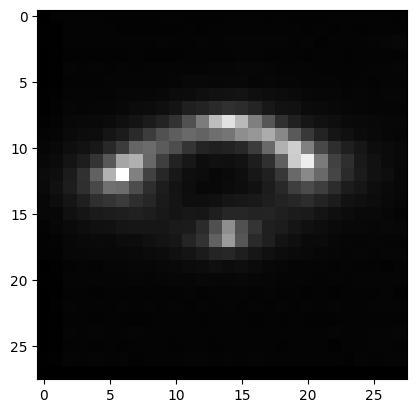

In [ ]:
file_path = "/content/drive/MyDrive/Hari/Evaluation/Diffusion/results/train_1_2/sample_97/npy/97_0.npy"  # Replace with your actual file path
image = np.load(file_path)
image1 = np.transpose(image,(1,2,0))
# Display the image
plt.imshow(image1, cmap='gray')  # Use 'gray' for single-channel images
plt.axis("on")  # Hide axis
plt.show()

In [ ]:
image_tensor = torch.tensor(image, dtype=torch.float32)
upscaled_tensor = F.interpolate(image_tensor.unsqueeze(0), size=(150), mode='bilinear', align_corners=False)

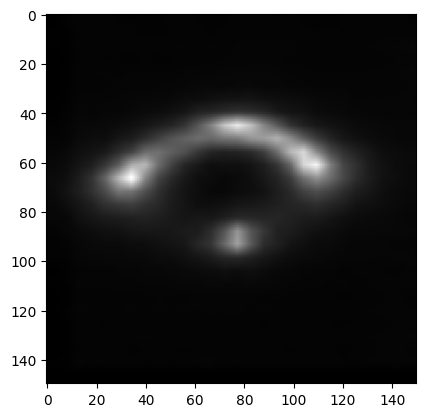

In [ ]:
upscaled = upscaled_tensor.squeeze(0).numpy()
upscaled = np.transpose(upscaled,(1,2,0))
plt.imshow(upscaled,cmap='gray')
plt.axis('on')
plt.show()

In [ ]:
path = "/content/drive/MyDrive/Hari/Evaluation/Diffusion/results/train_1_2/"
for i in range(100):
  dir = path + 'sample_{}/npy'.format(i)
  for j in range(1000):
    if((j == 0) or (j == 10) or (j == 20) or(j ==  30) or (j == 50) or (j == 70) or (j == 90) or (j == 100) or (j == 110) or (j == 120) or (j == 130) or (j == 140) or (j == 150) or (j == 160) or (j == 170) or (j == 180) or (j == 190) or (j == 200) or (j == 300) or (j== 500)):
      file_path = dir + '/{}_{}.npy'.format(i,j)
      png_dir = path + '100_pngs/{}'.format(i)
      os.makedirs(png_dir, exist_ok=True)
      img = np.load(file_path)
      img_tensor = torch.tensor(img, dtype=torch.float32)
      upscaled_tensor = F.interpolate(img_tensor.unsqueeze(0), size=(150), mode='bilinear', align_corners=False).squeeze(0)
      img_final = transforms.ToPILImage()(upscaled_tensor)
      img_final.save(os.path.join(png_dir, '{}.png'.format(j)))